In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Crawling**

In [0]:
import csv
from urllib.parse import quote_plus
from urllib.request import urlopen
from bs4 import BeautifulSoup

# .api_txt_lines.total_tit # 제목
# .api_txt_lines.dsc_txt # 내용

search = input('검색어를 입력하세요 : ')
url = f'https://m.search.naver.com/search.naver?where=m_view&sm=mtb_jum&query={quote_plus(search)}'

html = urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

total = soup.select('.api_txt_lines.total_tit')

searchList = []

for i in total:
  temp = []
  temp.append(i.text)
  temp.append('seria')
  searchList.append(temp)

f = open('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/seria43.csv', 'w', encoding='utf-8',newline='')
csvWriter = csv.writer(f)

for i in searchList:
  csvWriter.writerow(i)

f.close()
print('완료되었습니다.')

검색어를 입력하세요 : 데로시
완료되었습니다.


In [0]:
# 합치기
import csv
import glob
import os

input_path = r'/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category' # 파일들을 불러올 디렉터리 경로
output_path = r'/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/dataset.csv' # 하나로 합칠 파일명

first_file = True
for input_file in glob.glob(os.path.join(input_path, 'result_*')): # csv파일들과 주소를 결합하여 파일을 불러온다
    print(os.path.basename(input_file)) # 불러온 파일명을 print해서 확인할 수 있게 한다
    with open(input_file, 'r', newline='') as csv_in_file: # 불러온 csv파일을 연다
        with open(output_path, 'a', newline='') as csv_out_file: # 합칠 csv파일을 'a'로 해서 연다
            filereader = csv.reader(csv_in_file) # csv.reader()로 읽은 내용을 filereader에 저장한다
            filewriter = csv.writer(csv_out_file)
            if first_file: # 첫번째 파일의 경우, header와 같이 복사되도록 한다
                for row in filereader:
                    filewriter.writerow(row)
                first_file = False # 복사가 끝나면 첫번째 파일이 아니기 때문에 False로 명명한다
            else:
                header = next(filereader) # 첫번째 파일이 아닐경우, 머릿글을 header에 저장한다
                for row in filereader:
                    filewriter.writerow(row) # header를 제외하고 읽은 내용을 쓴다(이때 붙여진 내용은 이전 내용과 띄어쓰기 없이 붙여진다

print('완료되었습니다.')

result_seria.csv
result_epl.csv
result_laliga.csv
result_bundesliga.csv
완료되었습니다.


In [0]:
# 데이터셋 섞기
import csv
import random
import os
 
os.chdir("/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category") # Csv가 있는 경로 설정
 
file = open('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/dataset.csv', 'r', encoding='utf-8')
line = file.readlines()
random.shuffle(line)
rcsv = csv.reader(line)
 
file_write = open('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/dataset_shuffled.csv', 'w', encoding='utf-8', newline="")
wcsv = csv.writer(file_write)
 
for i in rcsv:
    try:
        wcsv.writerow([i[0].strip(), i[1]])
    except:
        pass

print('Done')

Done


In [0]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/dataset_shuffled.csv')
# df2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/dataset.csv')

In [143]:
df

,비엘사의 전술 노트 Ⅱ,laliga
0,독일 FC 쾰른 분데스리가 축구유학 인재 양성 프로젝트,bundesliga
1,19-20 분데스리가 22rd 쾰른 1 - 4 바이에른 뮌헨 경기 하이라이트,bundesliga
2,[눈 떠보니 안필드..?] 리버풀의 하부리그 영입생 6人,epl
3,크리스티아누 호날두 느그형 출전 유벤투스 낚시? #더페스타,seria
4,"내역 로스터 업데이트 급여 185 상승 신규 LH, TKL 클래스 loyal her...",laliga
...,...,...
8552,엘링 홀란드 보루시아 도르트문트 이적했어요.,bundesliga
8553,왓포드 갓포드,epl
8554,2020년3월7일 SD 에이바르 RCD 마요르카 / 제노아 CFC 파르마 칼초 19...,seria
8555,분데스리가 라이프치히 생각이상으로 강팀인듯,bundesliga


# **Word2Vec**

In [144]:
!pip install konlpy

In [0]:
from konlpy.tag import Okt
from gensim.models import Word2Vec
import csv
import pandas as pd

In [0]:
twitter = Okt()

file = open("/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/dataset_shuffled.csv", 'r', encoding='utf-8')
line = csv.reader(file)
token = []
embeddingmodel = []

In [147]:
for i in line:
    content = i[0]  # csv에서 뉴스 제목 또는 뉴스 본문 column으로 변경
    sentence = twitter.pos(i[0], norm=True, stem=True)
    temp = []
    temp_embedding = []
    all_temp = []

    for k in range(len(sentence)):
        temp_embedding.append(sentence[k][0])
        temp.append(sentence[k][0] + '/' + sentence[k][1])
    all_temp.append(temp)

    embeddingmodel.append(temp_embedding)
    category = i[1]  # csv에서 category column으로 변경
    category_number_dic = {'epl': 0, 'laliga': 1, 'bundesliga': 2, 'seria':3}
    all_temp.append(category_number_dic.get(category))
    token.append(all_temp)
    
print("토큰 처리 완료")

토큰 처리 완료


In [148]:
token

[[['비엘/Noun', '사의/Noun', '전술/Noun', '노트/Noun', 'Ⅱ/Foreign'], 1],
 [['독일/Noun',
   'FC/Alpha',
   '쾰른/Noun',
   '분데스리가/Noun',
   '축구/Noun',
   '유학/Noun',
   '인재/Noun',
   '양성/Noun',
   '프로젝트/Noun'],
  2],
 [['19-20/Number',
   '분데스리가/Noun',
   '22/Number',
   'rd/Alpha',
   '쾰른/Noun',
   '1/Number',
   '-/Punctuation',
   '4/Number',
   '바이에른/Noun',
   '뮌헨/Noun',
   '경기/Noun',
   '하이라이트/Noun'],
  2],
 [['[/Punctuation',
   '눈/Noun',
   '떠보다/Verb',
   '안필드/Noun',
   '..?]/Punctuation',
   '리버풀/Noun',
   '의/Josa',
   '하부/Noun',
   '리그/Noun',
   '영/Modifier',
   '입생/Noun',
   '6/Number',
   '人/Foreign'],
  0],
 [['크리스티아누/Noun',
   '호날두/Noun',
   '느그/Modifier',
   '형/Noun',
   '출전/Noun',
   '유벤투스/Noun',
   '낚시/Noun',
   '?/Punctuation',
   '#더페스타/Hashtag'],
  3],
 [['내/Determiner',
   '역/Noun',
   '로스/Noun',
   '터/Noun',
   '업데이트/Noun',
   '급여/Noun',
   '185/Number',
   '상승/Noun',
   '신규/Noun',
   'LH/Alpha',
   ',/Punctuation',
   'TKL/Alpha',
   '클래스/Noun',
   'loyal/Alpha',
   'heros/Alp

In [149]:
embeddingmodel = []
for i in range(len(token)):
    temp_embeddingmodel = []
    for k in range(len(token[i][0])):
        temp_embeddingmodel.append(token[i][0][k])
    embeddingmodel.append(temp_embeddingmodel)
embedding = Word2Vec(embeddingmodel, size=300, window=5, min_count=10, iter=5, sg=1, max_vocab_size=360000000)
embedding.save('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/league_category.embedding')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# **모델 데이터 로드 후 사용하기**

In [0]:
import gensim

In [151]:
model = gensim.models.Word2Vec.load('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/league_category.embedding')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [152]:
model.most_similar('맨체스터/Noun',topn = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('유나이티드/Noun', 0.9490293264389038),
 ('셰필드/Noun', 0.924314022064209),
 ('더비/Noun', 0.9151797294616699),
 ('풀/Noun', 0.9134194850921631),
 ('왓포드/Noun', 0.9116525650024414),
 ('시티/Noun', 0.9068192839622498),
 ('맨/Modifier', 0.905487060546875),
 ('노리치/Noun', 0.9034093618392944),
 ('United/Alpha', 0.9025795459747314),
 ('아스날/Noun', 0.8995835781097412),
 ('29/Number', 0.8992236852645874),
 ('팰리스/Noun', 0.8987734317779541),
 ('아스톤/Noun', 0.8984916806221008),
 ('북/Noun', 0.8917763233184814),
 ('아스톤빌라/Noun', 0.8915947675704956),
 ('크리스탈/Noun', 0.888206422328949),
 ('바오/Noun', 0.8869578838348389),
 ('빌라/Noun', 0.8807369470596313),
 ('레스터/Noun', 0.876806914806366),
 ('뉴캐슬/Noun', 0.8738974928855896)]

In [153]:
model.most_similar('프리미어리그/Noun',topn = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('잉글랜드/Noun', 0.9246515035629272),
 ('EPL/Alpha', 0.8445944786071777),
 ('프리미어/Noun', 0.8429152965545654),
 ('EFL/Alpha', 0.8266723155975342),
 ('epl/Alpha', 0.8106260895729065),
 ('아스널/Noun', 0.8098408579826355),
 ('영국/Noun', 0.797303318977356),
 ('셰필드/Noun', 0.7911719083786011),
 ('개막/Noun', 0.7870281338691711),
 ('뉴캐슬/Noun', 0.78643399477005),
 ('재개/Noun', 0.7847983837127686),
 ('19-20시/Number', 0.7822535634040833),
 ('6월/Number', 0.7817171812057495),
 ('유나이티드/Noun', 0.7808129191398621),
 ('주요/Noun', 0.7797605991363525),
 ('번리/Noun', 0.7761063575744629),
 ('빅/Noun', 0.771611213684082),
 ('소식/Noun', 0.7691706418991089),
 ('취소/Noun', 0.7676041722297668),
 ('30/Number', 0.7664787769317627)]

# **시각화**

In [154]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
import pandas as pd
import matplotlib.font_manager as fm  

font_path = '/content/gdrive/My Drive/Colab Notebooks/GraduationProject/나눔고딕.ttf'
mpl.rcParams['axes.unicode_minus'] = False
model = g.Doc2Vec.load('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/soccer_category/league_category.embedding')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [155]:
vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])

1481
[-0.036111    0.09953255 -0.03637497  0.24211632 -0.17637214 -0.12951365
  0.00358127  0.01293992  0.06235951  0.08814387]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [156]:
# Visualize only for 100 words only
# Decrease dimension

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [157]:
df.head(10)

,x,y
전술/Noun,-8.259097,-0.342415
노트/Noun,-5.127477,-0.242733
독일/Noun,-2.939786,5.039202
FC/Alpha,-7.827482,4.509346
쾰른/Noun,-3.241664,5.771124
분데스리가/Noun,-2.913826,5.638530
축구/Noun,-4.293068,4.434865
유학/Noun,-4.195603,2.690663
양성/Noun,-5.991305,-5.384338
19-20/Number,-8.936673,3.003372


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0, flags=flags)


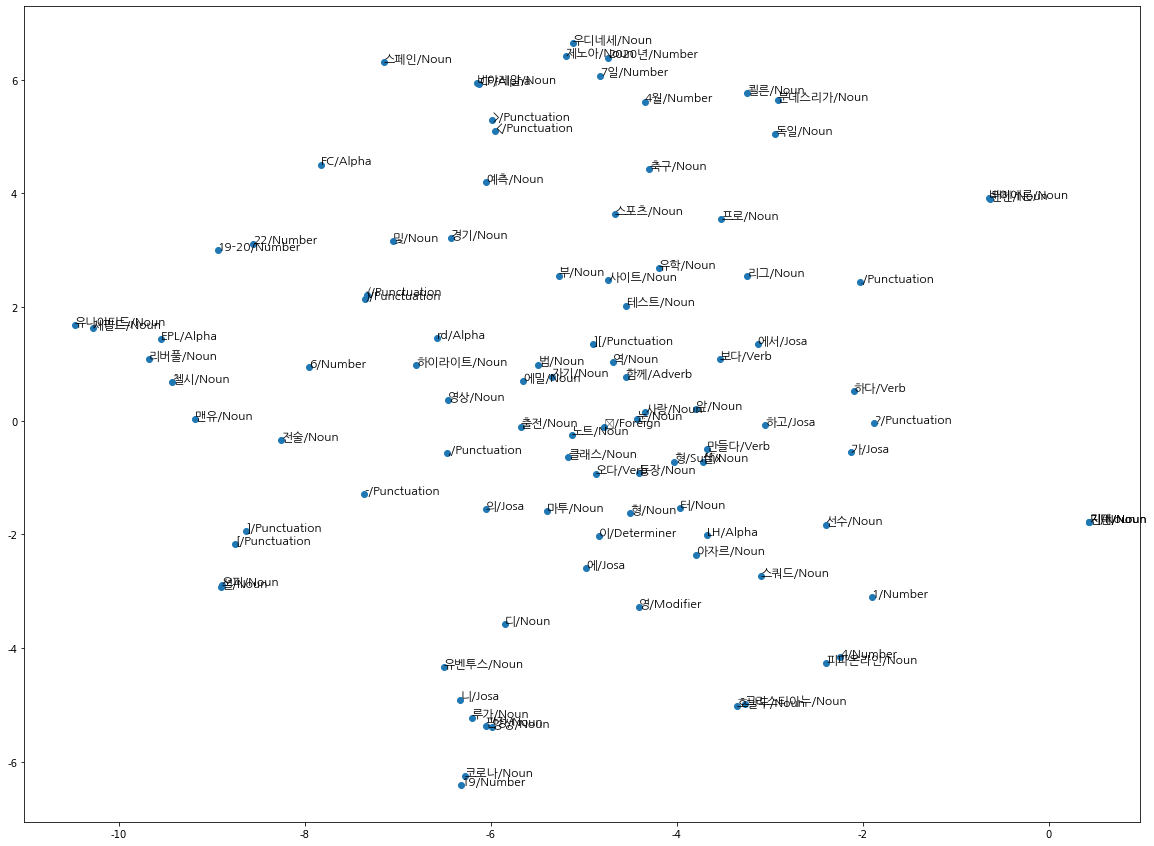

In [161]:
fig = plt.figure()
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1)
fontprop = fm.FontProperties(fname=font_path, size=12)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontproperties=fontprop)
plt.show()